# Assignment
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training is already uploaded along

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
import random

## Load *Dataset*
Load data from the given pickle file

In [2]:

data_file="MNIST_data.pkl"
# load the data set
with open(data_file,'rb') as infile:
    train_dataset = pickle.load(infile)
X = train_dataset['X']
y = train_dataset['y']

# normalize
stdev=np.std(X,axis=0,keepdims=True)
Mean=np.mean(X,axis=0,keepdims=True)
Normalised_X=(X-Mean)/(stdev+1e-7)
X=Normalised_X
# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.5)                                           

print(y_train)

[[8]
 [2]
 [4]
 ...
 [9]
 [2]
 [9]]


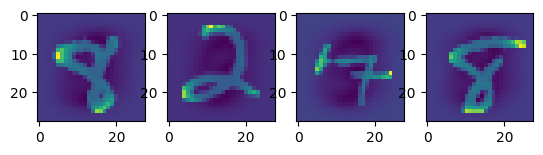

          13371          21695            4146            27581


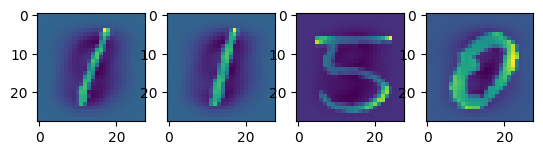

          29057          16876            14536            15564


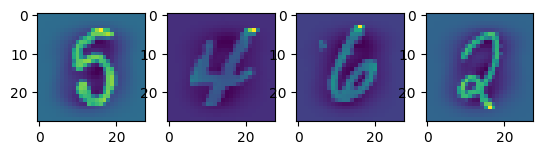

          22419          7232            18264            13037


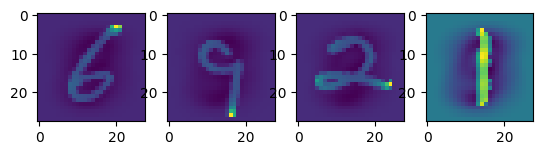

          23247          4058            6436            29911


In [3]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
a=np.arange(0,16)
for i in range(0,16):
    if(i%4==0):f, axis = plt.subplots(1, 4)
    a[i]=random.randint(0,30000)
    b=X_train[a[i]]
    axis[i%4].imshow(b.reshape(28,28))
    if(i%4==3):
        plt.show()
        print("         ",a[i-3],"        ",a[i-2],"          ",a[i-1],"          ",a[i])
    

## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    """
    Arguments:
    z -- A scalar or numpy array.
    Return:
    relu func applied to each element of z
    """
    return (np.maximum(0,z))
def softmax(z):
    """
    returns computed probabilitites for each element in batch separately
    input: (N, 10)
    output: (N, 10)
    """
    reduced=z-np.max(z,axis=1,keepdims=True)
    exped=np.exp(reduced)
    den=np.sum(exped,axis=1,keepdims=True)
    
    return exped/den



**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [5]:
def init_params(layer_1, hidden_layer, layer_2):
    """
    ideally it should take the size of all the layers and 
    should return the initialized weights.
    """
    N=30000
    np.random.seed(5)
    w1=0.1*np.random.randn(layer_1,hidden_layer)
    np.random.seed(6)
    w2=0.1*np.random.randn(hidden_layer,layer_2)
    
    b1=np.zeros((hidden_layer,1))
    b2=np.zeros((layer_2,1))
    w1,b1,w2,b2
    return w1,b1,w2,b2

**Forward Propagation**

In [6]:
def forward_propg(X, w1, w2, b1, b2):
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    #here X will be X train and its dimensions are N*784, dimensions of w1 are 784*256, dimensions of b1 are N*1
    #then dimensions of z1 are N*256 and z2 are N*10. w2 will have 256*10 and z1*w2 will have N*10. 
    z1=np.matmul(X,w1)
    z1=np.transpose(z1.transpose()+b1)
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=np.transpose(z2.transpose()+b2)
    #print(z2)
    a2=softmax(z2)
    #print(a2)
    return z1, z2, a1, a2
    

**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [7]:
def backward_propg(layer_1,hidden_layer,layer_2, w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr ):#"""output of forward propg"""
    """
    should update the weights and return updated weights
    """
    N=30000
    del_L_z2=np.divide(a2,N)
    for i in range(0,N,1):
        del_L_z2[i][y[i]]-=1/N
    del_L_w2=np.matmul(a1.transpose(),del_L_z2)
    del_L_a1=np.matmul(del_L_z2,w2.transpose())
    
    
    #dimensions of z2 are N,10 and that of b2 are N,1
    #print(del_L_z2.shape)
    del_L_b2=np.zeros((layer_2,1))
    
    '''del_L_z2=del_L_z2.transpose()
    for i in range (0,10,1):
        t=del_L_z2[i]
        del_L_b2=np.sum(t)
    del_L_z2=del_L_z2.transpose()'''
    del_L_b2=np.sum(del_L_z2,axis=0,keepdims=True)
    del_L_b2=del_L_b2.transpose()
    #a1=relu(z1)
    #del by z1=del by a1 (where a1[i][j]>0)
    
    m,n=a1.shape
    
    del_a1_z1=np.sign(a1)
    del_L_z1=del_L_a1*del_a1_z1
    
    del_L_b1=np.zeros((hidden_layer,1))
    del_L_b1=np.sum(del_L_z1,axis=0,keepdims=True)
    del_L_b1=del_L_b1.transpose()
        
    del_L_w1=np.matmul(X.transpose(),del_L_z1)
    #print(del_L_w1.shape)
    #doubt in del_by_b1 and del_by_b2
    
    #updates
    w1=w1 - lr*del_L_w1
    w2=w2 - lr*del_L_w2
    #print(b1.shape)
    #print(del_L_b1.shape)
    b1=b1 - lr*(del_L_b1)
    b2=b2 - lr*(del_L_b2)
    return w1,b1,w2,b2

In [8]:
def cost_func(a2,y):
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """
    N=30000
    l=np.zeros((N,))
    for i in range(N):
        l[i]=-math.log(a2[i][y[i]]+1e-4)
    L=np.mean(l)
    return L


## Integrate everything

In [9]:
def train(X, y, hidden_nodes, epochs=1000, lr=0.05):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    layer_1=784
    hidden_layer=256
    layer_2=10
    # initialize weights.
    
    w1,b1,w2,b2=init_params(layer_1,hidden_layer,layer_2)
    k=list()
    f=list()
    for i in range(epochs):
        # forward propagation
        z1,z2,a1,a2=forward_propg(X, w1, w2, b1, b2)
        
        # print cost at every 100 or so iterations
        # backward propagation
        w1,b1,w2,b2=backward_propg(layer_1,hidden_layer,layer_2,w1, b1, w2, b2, X, y, z1, z2, a1, a2,lr )
        L=cost_func(a2,y)
        k.append(L)
        print(i,"  ",L)
        f.append(i/10)
    plt.plot(f,k)
    plt.show()
    return w1,b1,w2,b2

0    3.8961157403971227
1    3.191734971795978
2    2.721815197065631
3    2.3694709955579762
4    2.097648609030351
5    1.883959960975018
6    1.713381718510821
7    1.5751749586549415
8    1.461542682856959
9    1.366843149267123
10    1.2868492653909052
11    1.2184481454265317
12    1.1593275042771163
13    1.1077214354771354
14    1.0622704215529295
15    1.0219025886355793
16    0.9857898325419158
17    0.9532711108630652
18    0.923826329424877
19    0.8970306200351937
20    0.8725322206891079
21    0.8500355317331343
22    0.8292951771969035
23    0.810100435579872
24    0.7922749325789474
25    0.7756651569524067
26    0.760145209287969
27    0.7456082300219711
28    0.7319594228575973
29    0.7191115156870729
30    0.7069890210136621
31    0.6955243138678529
32    0.6846590581471388
33    0.6743420640843809
34    0.6645306129037839
35    0.6551870241857151
36    0.6462749954400083
37    0.6377617586947231
38    0.6296191369477426
39    0.6218218434741282
40    0.614346969304

317    0.25572959785563804
318    0.2553901595149774
319    0.2550521338766781
320    0.25471545732750406
321    0.2543800825886939
322    0.2540461041614473
323    0.2537135261056292
324    0.2533823123013695
325    0.25305242285531765
326    0.2527238389568006
327    0.2523964534290797
328    0.25207034872962997
329    0.2517454636999996
330    0.25142176358984175
331    0.25109933492234876
332    0.2507780573024205
333    0.25045797108154705
334    0.2501390559539636
335    0.24982137571217278
336    0.2495049062044954
337    0.24918971632576928
338    0.24887572519591056
339    0.24856292900427945
340    0.24825134881794972
341    0.24794091446491284
342    0.24763165490112368
343    0.24732362214570394
344    0.24701668779719232
345    0.24671093408914413
346    0.24640631248576678
347    0.24610292258546707
348    0.24580073459739524
349    0.24549964072126773
350    0.24519964131645708
351    0.24490072171845464
352    0.2446028875180878
353    0.24430612133415924
354    0.24401

625    0.18824881083945422
626    0.18809913025033714
627    0.18794969620436713
628    0.1878005075415971
629    0.18765156727305063
630    0.18750290177985407
631    0.1873545217548664
632    0.1872064043901247
633    0.1870585616983499
634    0.1869109568833773
635    0.18676362666355348
636    0.18661654700635968
637    0.1864697366691541
638    0.18632313334214687
639    0.18617676008151002
640    0.18603063496427025
641    0.18588478808580172
642    0.1857391565133154
643    0.18559375819710724
644    0.1854485792360411
645    0.18530367086226276
646    0.18515901971065868
647    0.18501461732530253
648    0.18487047236480916
649    0.18472658686130822
650    0.18458296467443652
651    0.1844395873916595
652    0.18429644783294333
653    0.1841535423350783
654    0.18401089981439425
655    0.18386852255902106
656    0.18372640726426065
657    0.1835845399799572
658    0.18344293316968344
659    0.18330154123307166
660    0.18316041631637872
661    0.1830195641409108
662    0.1828

932    0.15198739580068268
933    0.15189280211316694
934    0.1517982944372341
935    0.151703901829479
936    0.15160964973522706
937    0.15151553374383553
938    0.15142153172234551
939    0.15132762536958946
940    0.15123383324293424
941    0.1511401410471766
942    0.15104655994073174
943    0.1509530901039015
944    0.15085973671292088
945    0.15076647292130074
946    0.150673273793746
947    0.150580188468872
948    0.15048720318862008
949    0.1503943141081554
950    0.1503015429385544
951    0.15020888404469254
952    0.15011632919786486
953    0.15002389305224179
954    0.14993156796295298
955    0.14983933941948085
956    0.14974719043085444
957    0.1496551575264095
958    0.14956322425579682
959    0.14947140537050366
960    0.14937966939895378
961    0.14928804213787913
962    0.14919651146346494
963    0.1491051088354389
964    0.14901381001571318
965    0.14892262429786499
966    0.148831525772667
967    0.14874053507532492
968    0.14864964880626882
969    0.1485588

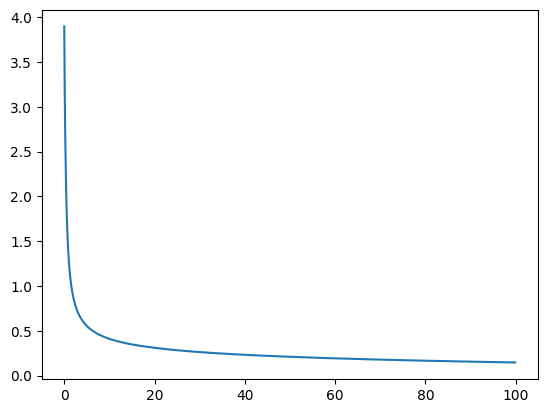

In [10]:
fw1,fb1,fw2,fb2=train(X_train,y_train,40,1000,0.05)

In [11]:
def predict(X, w1,b1,w2,b2):
    """
    returns the prediction in [0,9] for each element in X
    """
    z1=np.matmul(X,w1)
    z1=np.transpose(z1.transpose()+b1)
    a1=relu(z1)
    z2=np.matmul(a1,w2)
    z2=np.transpose(z2.transpose()+b2)
    #print(z2)
    a2=softmax(z2)
    y_predict=np.zeros((30000,1))
    for i in range(0,30000,1):
        j=a2[i].argmax()
        y_predict[i][0]=j
    return y_predict

In [12]:
def accuracy(y_predict, y):
    """
    prints % accuracy
    """
    t=0
    for i in range(0,30000):
        if(y_predict[i]==y[i]):t+=1
    return t/300    

In [13]:
y_predict=predict(X_test,fw1,fb1,fw2,fb2)

In [14]:
acc=accuracy(y_predict,y_test)
print(acc)

93.55333333333333


In [15]:
print(y_predict)

[[0.]
 [7.]
 [9.]
 ...
 [5.]
 [4.]
 [5.]]


### Save as pickle

In [ ]:
import pickle
import random

roll_num = "22b0396" # enter ldap
hidden_dim =256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': fw1, # layer 0 weight (784, z)
    'layer_0_bias': fb1, # layer 0 bias (z, 1)
    'layer_1_wt': fw2, # layer 1 weight (z, 10)
    'layer_1_bias': fb2 # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)